# Random Forest

In [1]:
# =============================================================================
# Random Forest
# =============================================================================

# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [2]:
# Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [3]:
# Feature Scaling -> Not necessary as it is not based on Euclidean distances
# but can be used to speed up calculations
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Model training
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy',
                                    max_leaf_nodes = None, # if you want to define a maximum of leaves per node
                                    min_samples_split = 2, # minimum number of data to do a split
                                    max_features = None, # If you want to define a limit of features used
                                    random_state = 0)


classifier.fit(X_train, y_train)
# Prediction
y_pred = classifier.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [6]:
# Feature importance
importance = classifier.feature_importances_
print(importance)

[0.49200989 0.50799011]


**Function visualize_classifier**

In [8]:
### Visualization
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

    plt.title('Random Forest Classifier')
    plt.show()

**Call the function with train data**

<ipython-input-8-b8c39b45d3f2>:19: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


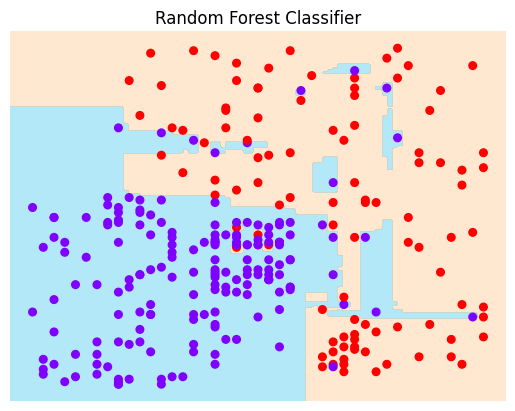

In [9]:
# Train
visualize_classifier(classifier, X_train, y_train)

**Call the function with test data**

<ipython-input-8-b8c39b45d3f2>:19: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


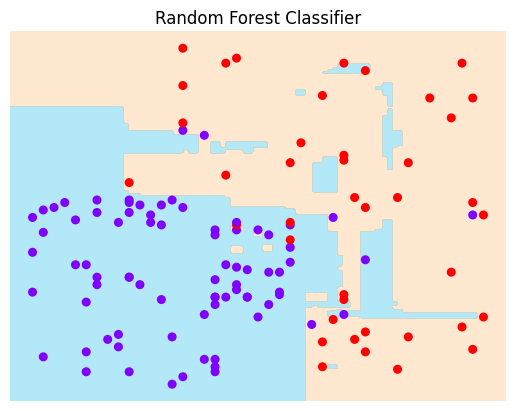

In [10]:
# Test
visualize_classifier(classifier, X_test, y_test)
